<a href="https://colab.research.google.com/github/ShimaaElabd/PyTorch_Classification/blob/master/Classifier_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Model Using Convolution Neural Network - PyTorch  


### By Shimaa Elabd

### Date: Feb 4, 2019


---



*  In this project I've build a model  architecture using CNN by pytorch. This Model can classify three categories (cat, dog and car).

* I've collect the dataset from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) and [Imagenet](https://ai.stanford.edu/~jkrause/cars/car_dataset.html).


*  This dataset consist of train, valid and test set. and 13500 image.

* The training set contain 9000 images, 3000 image for each class. 

* The test set contain 3000 images, 1000 image for each class. 

* The validation set contain 1500 images, 500 image for each class. 




## Cats vs. Dogs vs.  Cars

---



## Dataset Gathering 

###  This dataset is comination between two daatasets which are: 

*   Cats Vs. Dogs From Kaggle [Here](https://www.kaggle.com/c/dogs-vs-cats/data)
*   Cars Dataset From Imagenet Stanford [Here](https://ai.stanford.edu/~jkrause/cars/car_dataset.html)






In [0]:
!pip install -U -q PyDrive 

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 21.7MB/s 


In [0]:
# Upload the dataset frommy drive 
import json
json_import = drive.CreateFile({'id':'1nsev2BD_syfxr-V2-D2ESEkRaq9Mdcmw'})
json_import.GetContentFile('Dataset.zip')

In [0]:
# Extract the dataset
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/Test/
   creating: Dataset/Test/Car/
  inflating: Dataset/Test/Car/05501.jpg  
  inflating: Dataset/Test/Car/05502.jpg  
  inflating: Dataset/Test/Car/05503.jpg  
  inflating: Dataset/Test/Car/05504.jpg  
  inflating: Dataset/Test/Car/05505.jpg  
  inflating: Dataset/Test/Car/05506.jpg  
  inflating: Dataset/Test/Car/05507.jpg  
  inflating: Dataset/Test/Car/05508.jpg  
  inflating: Dataset/Test/Car/05509.jpg  
  inflating: Dataset/Test/Car/05510.jpg  
  inflating: Dataset/Test/Car/05511.jpg  
  inflating: Dataset/Test/Car/05512.jpg  
  inflating: Dataset/Test/Car/05513.jpg  
  inflating: Dataset/Test/Car/05514.jpg  
  inflating: Dataset/Test/Car/05515.jpg  
  inflating: Dataset/Test/Car/05516.jpg  
  inflating: Dataset/Test/Car/05517.jpg  
  inflating: Dataset/Test/Car/05518.jpg  
  inflating: Dataset/Test/Car/05519.jpg  
  inflating: Dataset/Test/Car/05520.jpg  
  inflating: Dataset/Test/Car/05521.jpg  
  inflating: Dat

## Imort Dependencies

In [0]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sb
import cv2
import random
import datetime
from IPython.core.debugger import set_trace
# PyTorch Dependencies
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from collections import OrderedDict

In [0]:
!pwd
!ls

/content
adc.json  Dataset  Dataset.zip	sample_data


In [0]:
!ls Dataset

Test  Train  Valid


In [0]:
# Define paths of Train, Valid and Test
Dataset_Path = '/content/Dataset'
Train_path = Dataset_Path + '/Train'
Valid_path = Dataset_Path + '/Valid'
Test_path  = Dataset_Path + '/Test'

In [0]:
# Define transforms, crop and normalize the training, validation, and testing sets
# Torchvision transforms are used to augment the training data with random scaling, Flipping, Color Jittering, and cropping

Training_transforms = transforms.Compose([transforms.Resize(256),
                                          transforms.RandomCrop(224),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ColorJitter(.3, .3, .3),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406], 
                                                               [0.229, 0.224, 0.225])])

Validation_transforms = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], 
                                                                 [0.229, 0.224, 0.225])])

Testing_transforms = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], 
                                                              [0.229, 0.224, 0.225])])


# The data for each set (train, validation, test) is loaded with torchvision's ImageFolder
Train_Dataset = datasets.ImageFolder(Train_path, transform = Training_transforms)
Valid_Dataset = datasets.ImageFolder(Valid_path, transform = Validation_transforms)
Test_Dataset  = datasets.ImageFolder(Test_path, transform = Testing_transforms)

# Data batching --The data for each set is loaded with torchvision's DataLoader--
Train_dl = DataLoader(Train_Dataset, batch_size=64, shuffle=True)
Validate_dl = DataLoader(Valid_Dataset, batch_size=32, shuffle=False,)
Test_dl = DataLoader(Test_Dataset, batch_size=32, shuffle=False,)

## Dataset Assessment

In [0]:
print( "Training set contains: {} image".format(len(Train_Dataset)))
print( "Validation set contains: {} image".format(len(Valid_Dataset)))
print( "Test set contains : {} image".format(len(Test_Dataset)))


Training set contains: 9000 image
Validation set contains: 1500 image
Test set contains : 3002 image


In [0]:
Train_Dataset.classes

['Car', 'Cat', 'Dog']

In [0]:
Train_Dataset.class_to_idx

{'Car': 0, 'Cat': 1, 'Dog': 2}

In [0]:
Train_Dataset.imgs

[('/content/Dataset/Train/Car/00001.jpg', 0),
 ('/content/Dataset/Train/Car/00002.jpg', 0),
 ('/content/Dataset/Train/Car/00003.jpg', 0),
 ('/content/Dataset/Train/Car/00004.jpg', 0),
 ('/content/Dataset/Train/Car/00005.jpg', 0),
 ('/content/Dataset/Train/Car/00006.jpg', 0),
 ('/content/Dataset/Train/Car/00007.jpg', 0),
 ('/content/Dataset/Train/Car/00008.jpg', 0),
 ('/content/Dataset/Train/Car/00009.jpg', 0),
 ('/content/Dataset/Train/Car/00010.jpg', 0),
 ('/content/Dataset/Train/Car/00011.jpg', 0),
 ('/content/Dataset/Train/Car/00012.jpg', 0),
 ('/content/Dataset/Train/Car/00013.jpg', 0),
 ('/content/Dataset/Train/Car/00014.jpg', 0),
 ('/content/Dataset/Train/Car/00015.jpg', 0),
 ('/content/Dataset/Train/Car/00016.jpg', 0),
 ('/content/Dataset/Train/Car/00017.jpg', 0),
 ('/content/Dataset/Train/Car/00018.jpg', 0),
 ('/content/Dataset/Train/Car/00019.jpg', 0),
 ('/content/Dataset/Train/Car/00020.jpg', 0),
 ('/content/Dataset/Train/Car/00021.jpg', 0),
 ('/content/Dataset/Train/Car/0002

## The Model 


*   Using VGG --one of the pretrained models from torchvision.models-- to get the image features. As the VGG networks work great and are straightforward to use

* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout.

* Train the classifier layers using backpropagation using the pre-trained network to get the features

* The parameters of the feedforward classifier are  trained, while the parameters of the feature network are left static




In [0]:
# Transfer Learning -- VGG16 is loaded from torchvision.models--
model = models.vgg16(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:22<00:00, 24286466.00it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
# Freeze pretrained model parameters to avoid backpropogating through them
for parameter in model.parameters():
    parameter.requires_grad = False


# Build custom classifier for 3 categories
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 10000)),
                                        ('relu', nn.ReLU()),
                                        ('drop', nn.Dropout(p=0.5)),
                                        ('fc2', nn.Linear(10000, 3)),
                                        ('output', nn.LogSoftmax(dim=1))]))

model.classifier = classifier

In [0]:
# Function for calculating Validation Loss and Accuracy for the validation set

def validation(model, validateloader, criterion):
    
    validation_loss = 0
    accuracy = 0
    
    for images, labels in iter(validateloader):

        images, labels = images.to('cuda'), labels.to('cuda')

        output = model.forward(images)
        validation_loss += criterion(output, labels).item()

        probabilities = torch.exp(output)
        
        # equality variable specifies which of the model predictions are correct by comparing it with the ground truth (Labels)
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return validation_loss, accuracy

In [0]:
# Loss function and Optimizer

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

## Train the classifier





In [0]:
# Train the classifier
# During training, display the validation loss and accuracy  

def train_classifier():
  epochs = 15
  steps = 0
  print_every = 40

  model.to('cuda')

  for epoch in range(epochs):

      model.train()
      running_loss = 0
      
      for images, labels in iter(Train_dl):

          steps += 1

          images, labels = images.to('cuda'), labels.to('cuda')

          optimizer.zero_grad()

          output = model.forward(images)
          loss = criterion(output, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

          if steps % print_every == 0:

              model.eval()

              # Turn off gradients for validation, saves memory and computations
              with torch.no_grad():
                  validation_loss, accuracy = validation(model, Validate_dl, criterion)

              print("Epoch: {}/{}.. ".format(epoch+1, epochs),
                    "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                    "Validation Loss: {:.3f}.. ".format(validation_loss/len(Validate_dl)),
                    "Validation Accuracy: {:.3f}".format(accuracy/len(Validate_dl)))

              running_loss = 0
              model.train()

train_classifier()

Epoch: 1/15..  Training Loss: 0.555..  Validation Loss: 0.340..  Validation Accuracy: 0.982
Epoch: 1/15..  Training Loss: 0.507..  Validation Loss: 0.738..  Validation Accuracy: 0.974
Epoch: 1/15..  Training Loss: 0.703..  Validation Loss: 0.385..  Validation Accuracy: 0.984
Epoch: 2/15..  Training Loss: 0.292..  Validation Loss: 0.728..  Validation Accuracy: 0.978
Epoch: 2/15..  Training Loss: 0.852..  Validation Loss: 1.199..  Validation Accuracy: 0.972
Epoch: 2/15..  Training Loss: 0.851..  Validation Loss: 0.548..  Validation Accuracy: 0.986
Epoch: 2/15..  Training Loss: 0.881..  Validation Loss: 0.688..  Validation Accuracy: 0.987
Epoch: 3/15..  Training Loss: 0.656..  Validation Loss: 0.711..  Validation Accuracy: 0.986
Epoch: 3/15..  Training Loss: 0.829..  Validation Loss: 0.562..  Validation Accuracy: 0.988
Epoch: 3/15..  Training Loss: 0.766..  Validation Loss: 0.819..  Validation Accuracy: 0.983
Epoch: 4/15..  Training Loss: 0.265..  Validation Loss: 0.480..  Validation Accu

## Evaluation

In [0]:
# This Function for measuring The network's accuracy on the test data
def test_accuracy(model, Test_dl):

    model.eval()
    model.to('cuda')

    with torch.no_grad():
    
        accuracy = 0
    
        for images, labels in iter(Test_dl):
    
            images, labels = images.to('cuda'), labels.to('cuda')
    
            output = model.forward(images)

            probabilities = torch.exp(output)
        
            equality = (labels.data == probabilities.max(dim=1)[1])
        
            accuracy += equality.type(torch.FloatTensor).mean()
        
        print("Test Accuracy: {}".format(accuracy/len(Test_dl)))    
        
        
test_accuracy(model, Test_dl)

Test Accuracy: 0.9882109761238098


## Save checkpoints


In [0]:
# Save the checkpoint

def save_checkpoint(model):

    model.class_to_idx = Train_Dataset.class_to_idx

    checkpoint = {'arch': "vgg16",
                  'class_to_idx': model.class_to_idx,
                  'model_state_dict': model.state_dict()
                 }

    torch.save(checkpoint, 'checkpoint.pth')
    
save_checkpoint(model)

In [0]:
# This Function to loads the checkpoint and rebuild the model

def load_checkpoint(filepath):
    
    checkpoint = torch.load(filepath)
    
    if checkpoint['arch'] == 'vgg16':
        
        model = models.vgg16(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
    else:
        print("Architecture not recognized.")
    
    model.class_to_idx = checkpoint['class_to_idx']
    
    classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 10000)),
                                            ('relu', nn.ReLU()),
                                            ('drop', nn.Dropout(p=0.5)),
                                            ('fc2', nn.Linear(10000, 3)),
                                            ('output', nn.LogSoftmax(dim=1))]))

    model.classifier = classifier
    
    model.load_state_dict(checkpoint['model_state_dict'])
    
    return model

load_checkpoint('checkpoint.pth')  
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # Process a PIL image for use in a PyTorch model
    
    pil_image = Image.open(image_path)
    
    # Resize
    if pil_image.size[0] > pil_image.size[1]:
        pil_image.thumbnail((5000, 256))
    else:
        pil_image.thumbnail((256, 5000))
        
    # Crop 
    left_margin = (pil_image.width-224)/2
    bottom_margin = (pil_image.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    
    pil_image = pil_image.crop((left_margin, bottom_margin, right_margin, top_margin))
    
    # Normalize
    np_image = np.array(pil_image)/255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
    
    # PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array
    # Color channel needs to be first; retain the order of the other two dimensions.
    np_image = np_image.transpose((2, 0, 1))
    
    return np_image

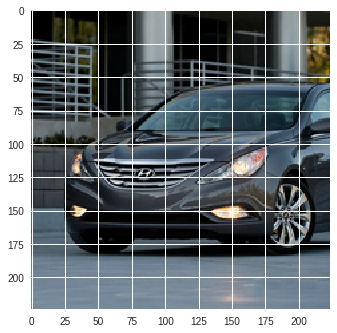

In [0]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    if title is not None:
        ax.set_title(title)
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

image = process_image('/content/Dataset/Test/Car/05546.jpg')
imshow(image)

In [0]:
# Implement the code to predict the class from an image file

def predict(image_path, model, topk=1):
    ''' Predict the class of an image using a trained deep learning model.
    '''
    
    image = process_image(image_path)
    
    # Convert image to PyTorch tensor first
    image = torch.from_numpy(image).type(torch.cuda.FloatTensor)
    
    # Returns a new tensor with a dimension of size one inserted at the specified position.
    image = image.unsqueeze(0)
    
    output = model.forward(image)
    
    probabilities = torch.exp(output)
    
    # Probabilities and the indices of those probabilities corresponding to the classes
    top_probabilities, top_indices = probabilities.topk(topk)
    
    # Convert to lists
    top_probabilities = top_probabilities.detach().type(torch.FloatTensor).numpy().tolist()[0] 
    top_indices = top_indices.detach().type(torch.FloatTensor).numpy().tolist()[0] 
    
    # Convert topk_indices to the actual class labels using class_to_idx
    # Invert the dictionary so you get a mapping from index to class.
    
    idx_to_class = {value: key for key, value in model.class_to_idx.items()}
    #print(idx_to_class)
    
    top_classes = [idx_to_class[index] for index in top_indices]
    
    return top_probabilities, top_classes
    


## Class Prediction

[1.0]
['Car']


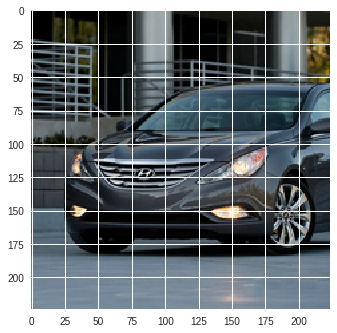

In [0]:
img_pth = '/content/Dataset/Test/Car/05546.jpg'
image = process_image(img_pth)
probs, classes = predict(img_pth, model)   
print(probs)
print(classes)
imshow(image)

## Test any Image

In [0]:
# Upload any image
from google.colab import files

uploaded = files.upload()

Saving d.jpg to d (1).jpg


In [0]:
!ls

adc.json  checkpoint.pth  Dataset  Dataset.zip	j.jpg  sample_data


[1.0]
['Car']


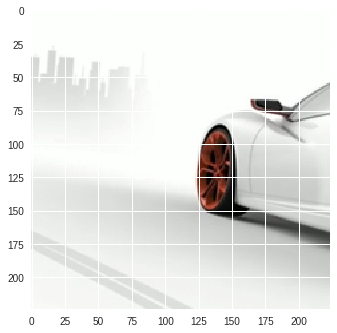

In [0]:
image = process_image('/content/j.jpg')    
probs, classes = predict('/content/j.jpg', model) 
imshow(image)
print(probs)
print(classes)

[1.0]
['Dog']


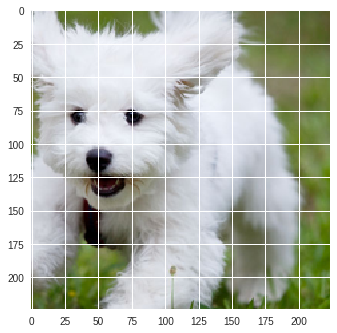

In [0]:
image = process_image('/content/d (1).jpg')
    
probs, classes = predict('/content/d (1).jpg', model) 
imshow(image)
print(probs)
print(classes)

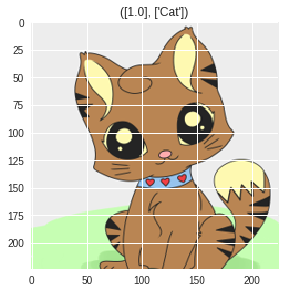

In [0]:
# Display an image along with the top class

plt.figure(figsize = (6,10))
plot_1 = plt.subplot(2,1,1)

image = process_image('/content/c.jpg')
probs, classes = predict('/content/c.jpg', model) 

image_title = probs, classes 

imshow(image, plot_1, title = image_title);


plt.show()

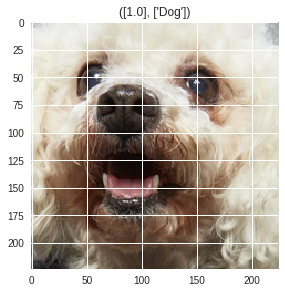

In [0]:
plt.figure(figsize = (6,10))
plot_1 = plt.subplot(2,1,1)

image = process_image('/content/p.jpg')
probs, classes = predict('/content/p.jpg', model) 

image_title = probs, classes 

imshow(image, plot_1, title = image_title);


plt.show()